In [2]:
import os
import sys
import pandas as pd, geopandas as gp, matplotlib.pyplot as plt, numpy as np
import json
import fiona

### List ESRI transit analysis geodatabase contents

In [4]:
!ls Data

Emergency_Operation_Center_Data.gdb Transit_Data_Analysis.gdb


In [6]:
fiona.listlayers('Data/Transit_Data_Analysis.gdb')

['stops_am_peak_30_fc',
 'stops_pm_peak_30_fc',
 'stops_am_peak_15_fc',
 'stops_pm_peak_15_fc',
 'transitStops_existing_01_2020',
 'transitStops_potential_01_2020',
 'rt_line_template_fc_6_22_20',
 'routes_am_peak_fc_6_22_20',
 'route_paths_6_22_20',
 'route_paths_deduplicated_6_22_20',
 'route_paths_deduplicated_NAD83_6_22_20',
 'wed_all_day_route_frequency_6_30_20',
 'wed_am_route_frequency_6_30_20',
 'wed_pm_route_frequency_6_30_20',
 'weekday_all_day_route_frequency_6_30_20',
 'weekday_am_route_frequency_6_30_20',
 'weekday_pm_route_frequency_6_30_20',
 'missing_route_shape_weekend_am',
 'missing_route_shape_weekday_pm',
 'missing_route_shape_weekday_allday',
 'transit_routes_weekday_allday_6_30_20',
 'transit_routes_weekday_am_6_30_20',
 'transit_routes_weekday_pm_6_30_20']

### Read pretty transit route data from geodatabase

ACE train route was replaced with correct shape which was provided in the historical feed from January. Route shapes were generated previously using ESRI GTFS tools.

In [7]:
pretty_routes = gp.read_file('Data/Transit_Data_Analysis.gdb', driver='FileGDB',layer='route_paths_6_22_20')

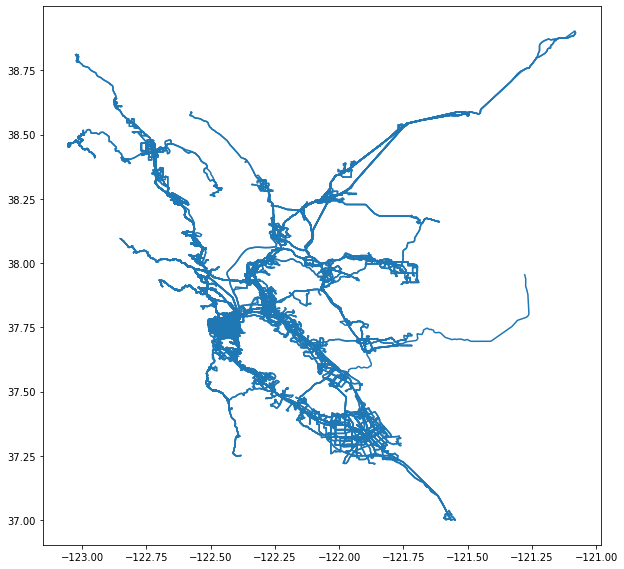

In [10]:
pretty_routes.plot(figsize=(10,10));

In [11]:
pretty_routes.crs

{'init': 'epsg:4326'}

In [13]:
pretty_routes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Shape_Length      3069 non-null   float64 
 1   shape_id          3068 non-null   object  
 2   route_id          1500 non-null   object  
 3   agency_id         1500 non-null   object  
 4   route_short_name  1499 non-null   object  
 5   route_long_name   1486 non-null   object  
 6   route_desc        159 non-null    object  
 7   route_type        1499 non-null   object  
 8   route_url         929 non-null    object  
 9   route_color       1270 non-null   object  
 10  route_text_color  1139 non-null   object  
 11  route_sort_order  1499 non-null   object  
 12  route_type_text   1500 non-null   object  
 13  agency_name       1500 non-null   object  
 14  geometry          3057 non-null   geometry
dtypes: float64(1), geometry(1), object(13)
memory usage: 359.8+ KB


### Filter out SFO airport shuttle

In [18]:
pretty_routes['agency_name'].unique()

array(['Tri Delta Transit', 'AC Transit', None,
       'Capitol Corridor Joint Powers Authority',
       'Bay Area Rapid Transit', 'County Connection',
       'Commute.org Shuttles', 'Caltrain', 'Dumbarton Express Consortium',
       'Emery Go-Round', 'Fairfield and Suisun Transit',
       'Golden Gate Ferry', 'Golden Gate Transit', 'Marin Transit',
       'Petaluma Transit', 'Rio Vista Delta Breeze',
       'Sonoma Marin Area Rail Transit', 'San Francisco Bay Ferry', 'VTA',
       'San Francisco Municipal Transportation Agency',
       'San Francisco International Airport', 'SamTrans',
       'Sonoma County Transit', 'Santa Rosa CityBus',
       'City of South San Francisco', 'SolTrans', 'Tideline Water Taxi',
       'Union City Transit', 'Vacaville City Coach', 'VINE Transit',
       'WestCat (Western Contra Costa)',
       'Livermore Amador Valley Transit Authority',
       'Altamont Corridor Express'], dtype=object)

In [24]:
pretty_routes = pretty_routes[pretty_routes['agency_name'] != 'San Francisco International Airport']